In [108]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pycountry
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

**LOADING DATA**

In [110]:
happiness_2015 = pd.read_csv('2015.csv')
happiness_2016 = pd.read_csv('2016.csv')
happiness_2017 = pd.read_csv('2017.csv')
happiness_2018 = pd.read_csv('2018.csv')
happiness_2019 = pd.read_csv('2019.csv')

In [111]:
happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [112]:
happiness_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [113]:
happiness_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [114]:
happiness_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [115]:
happiness_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


**DROPPING UNNCESSARY COLUMNS AND RENAMING**

In [116]:
happiness_2017 = happiness_2017.drop(["Whisker.high","Whisker.low","Dystopia.Residual"], axis = 1)
happiness_2017.columns = ["Country or region","Overall rank","Score","GDP per capita",'Social support',"Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]

In [117]:
happiness_2016 = happiness_2016.drop(['Region','Lower Confidence Interval','Upper Confidence Interval', 'Dystopia Residual'],axis = 1)
happiness_2016.columns = ["Country or region","Overall rank","Score","GDP per capita",'Social support',"Healthy life expectancy","Freedom to make life choices","Perceptions of corruption","Generosity"]

In [118]:
happiness_2015 = happiness_2015.drop(["Region",'Standard Error','Dystopia Residual'],axis=1)
happiness_2015.columns = ["Country or region","Overall rank","Score","GDP per capita",'Social support',"Healthy life expectancy","Freedom to make life choices","Perceptions of corruption","Generosity"]

**CONCATENETING DATASETS**

In [119]:
data = pd.concat([happiness_2015,happiness_2016,happiness_2017,happiness_2018,happiness_2019]).groupby('Overall rank', as_index=True).agg({
    'Country or region': 'first', 
    'Score': 'mean', 'GDP per capita': 'mean', 
    'Social support': 'mean', 
    'Healthy life expectancy': 'mean',
     'Freedom to make life choices': 'mean', 
     'Perceptions of corruption': 'mean',
      'Generosity': 'mean' })

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             158 non-null    object 
 1   Score                         158 non-null    float64
 2   GDP per capita                158 non-null    float64
 3   Social support                158 non-null    float64
 4   Healthy life expectancy       158 non-null    float64
 5   Freedom to make life choices  158 non-null    float64
 6   Perceptions of corruption     158 non-null    float64
 7   Generosity                    158 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.1+ KB


In [121]:
data.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
Overall rank,,,,,,,,
1,Switzerland,7.6102,1.419951,1.445155,0.878627,0.631481,0.393255,0.275100
2,Iceland,7.5572,1.430207,1.450718,0.892087,0.623669,0.340850,0.322082
3,Denmark,7.5282,1.414355,1.465283,0.894304,0.625757,0.307169,0.369742
4,Norway,7.5006,1.464884,1.448552,0.895826,0.630778,0.269159,0.344698
5,Canada,7.4568,1.398368,1.413699,0.890340,0.607792,0.355444,0.307303


**CHECKING FOR NULL VALUES**

In [122]:
data.isnull().sum()

Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
Generosity                      0
dtype: int64

**EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

In [123]:
data.rename(columns={'Country or region':'country'}, inplace=True)

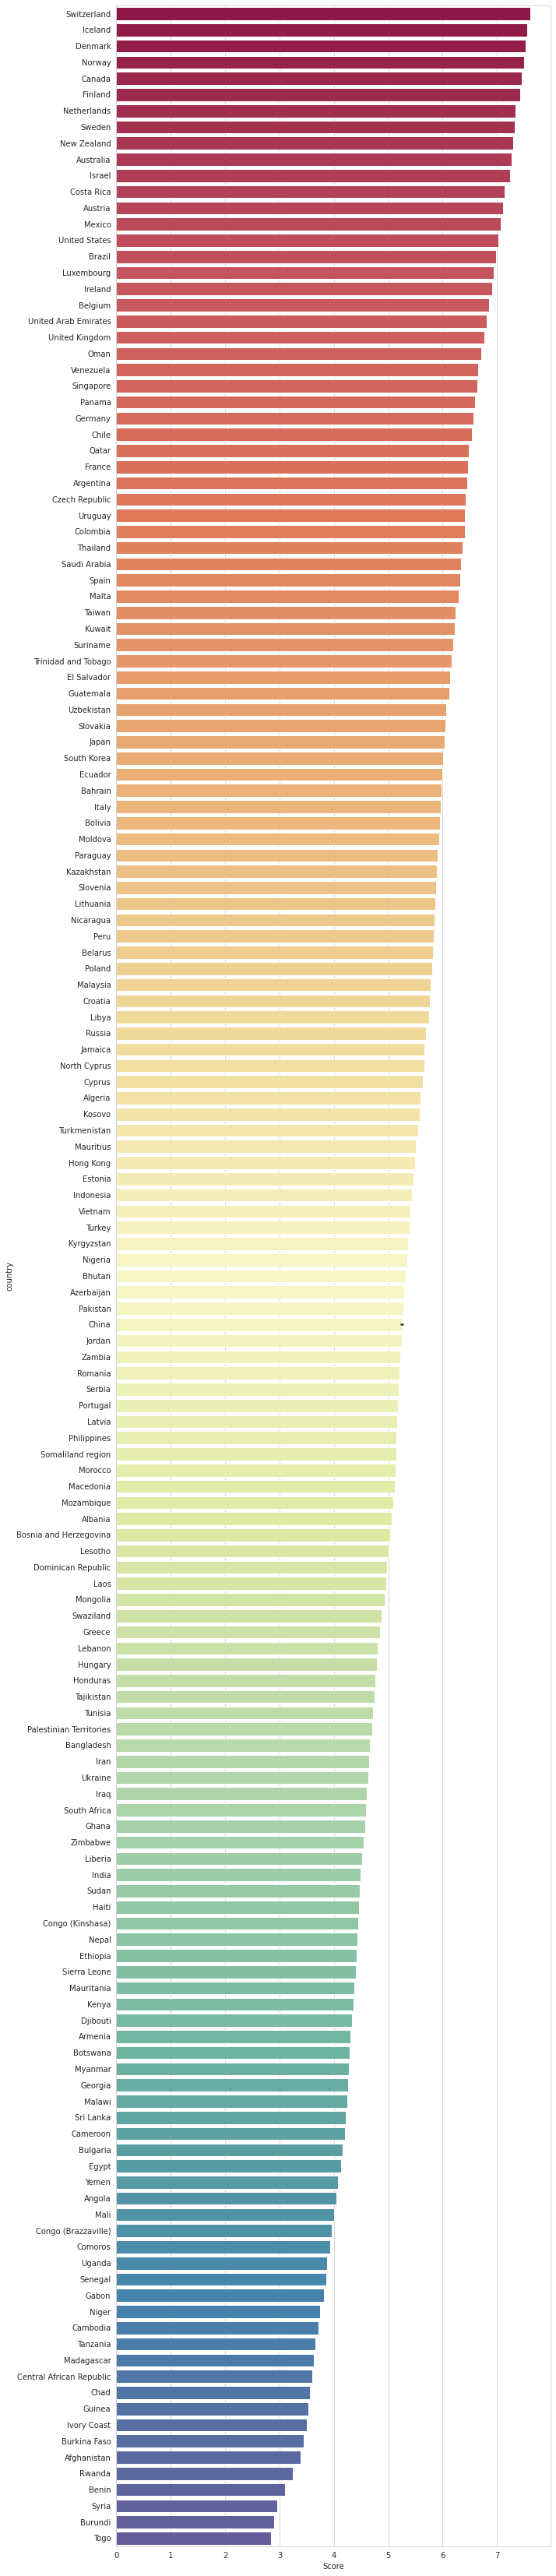

In [124]:
data = data.sort_values('Score', ascending = False)
plt.figure(figsize =(10,60))
sns.barplot(y=data['country'], x= data['Score'], palette = "Spectral")
#plt.barh(data['country'], data['Score'], 0.6)

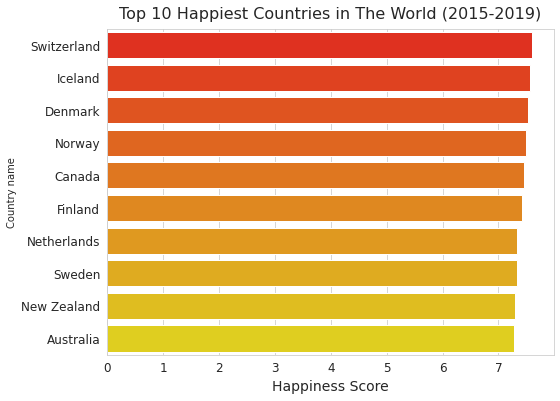

In [125]:
happy_10 = data[['country', 'Score']].head(10)
plt.figure(figsize = (8,6)) 
ax = sns.barplot(x='Score', y='country', data=happy_10, palette='autumn')
sns.set_style("ticks")
plt.title("Top 10 Happiest Countries in The World (2015-2019)", fontsize = 16, pad=10)
ax.set_xlabel("Happiness Score", fontsize=14, labelpad=5)
ax.set_ylabel("Country name")
ax.tick_params(labelsize=12)
plt.show()


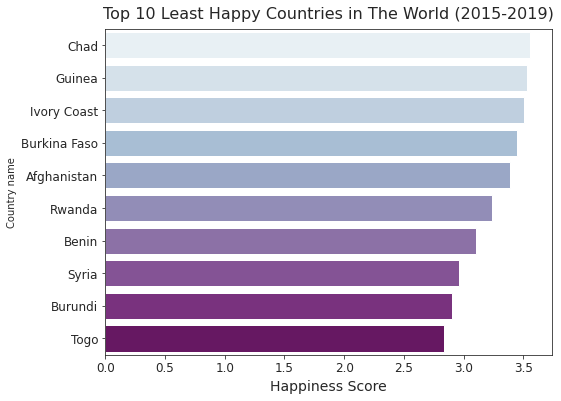

In [126]:
unhappy_10 = data[['country', 'Score']].tail(10)
plt.figure(figsize = (8,6)) 
ax = sns.barplot(x='Score', y='country', data=unhappy_10, palette='BuPu')
sns.set_style("ticks")
plt.title("Top 10 Least Happy Countries in The World (2015-2019)", fontsize = 16, pad=10)
ax.set_xlabel("Happiness Score", fontsize=14, labelpad=5)
ax.set_ylabel("Country name")
ax.tick_params(labelsize=12)
plt.show()

In [127]:
feature = ['Social support','Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']

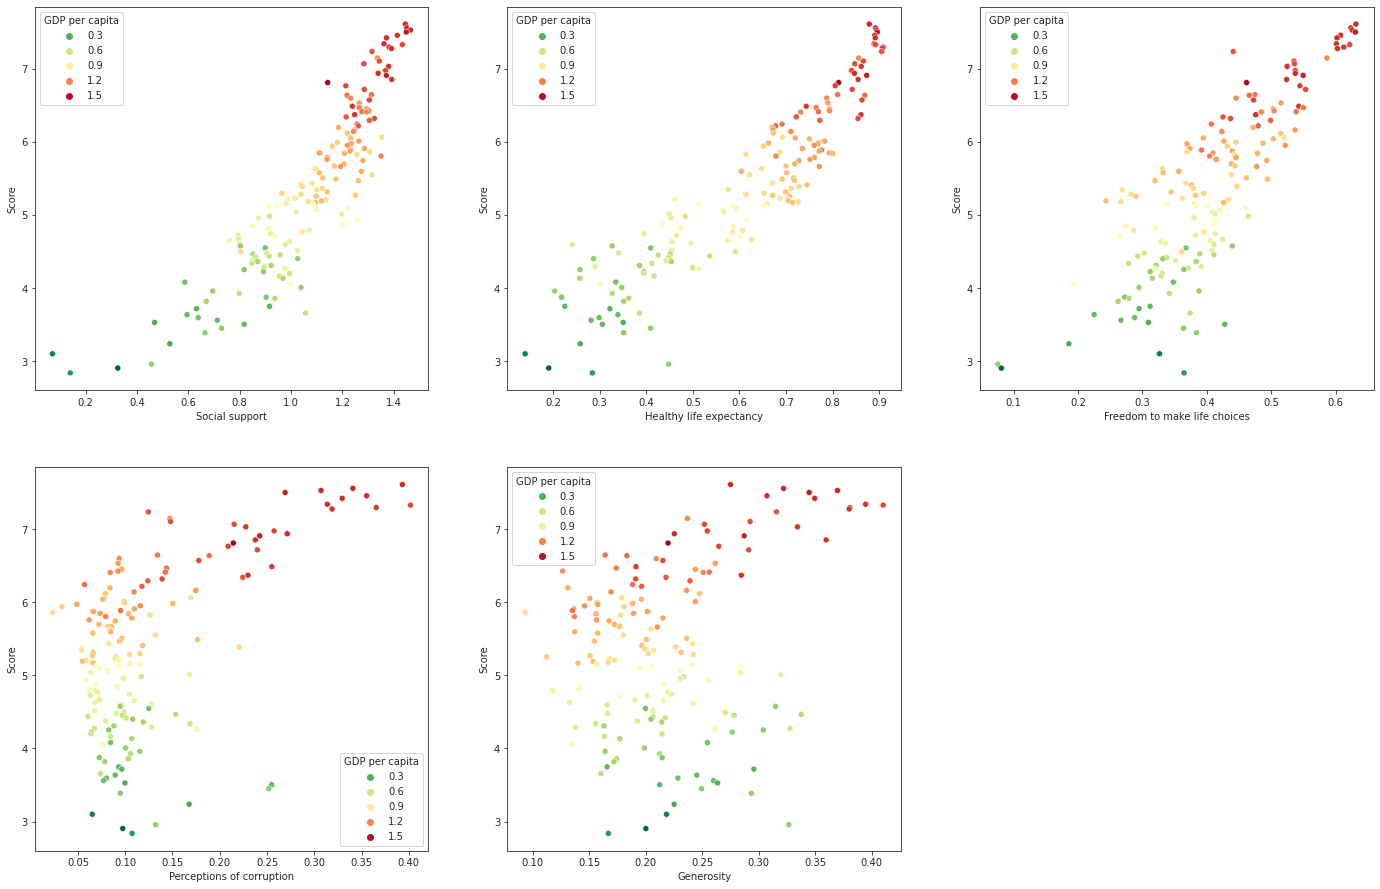

In [128]:
plt.figure(figsize=(24,24))
for i in enumerate(feature):
  plt.subplot(3,3,i[0]+1)
  sns.scatterplot(x=i[1],y='Score', hue = 'GDP per capita', data =data, palette="RdYlGn_r")

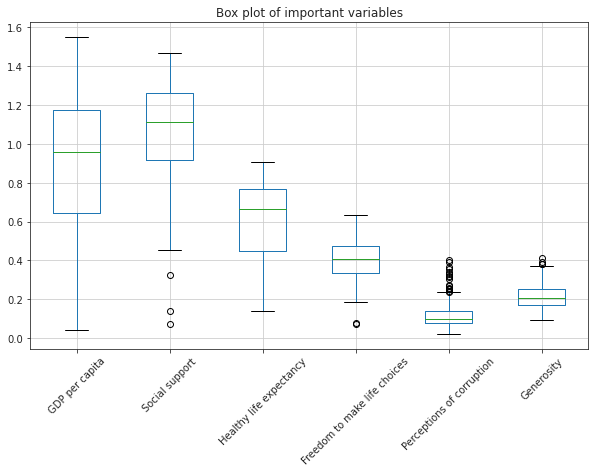

In [129]:
plt.figure(figsize=(10,6))
databox = data.drop(columns = 'Score')
databox.boxplot()
plt.title('Box plot of important variables')
plt.xticks(rotation=45)
plt.show()

In [130]:
data.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
Score,1.000000,0.952124,0.890524,0.923380,0.825339,0.541597,0.268091
GDP per capita,0.952124,1.000000,0.880700,0.947502,0.733267,0.473651,0.158457
Social support,0.890524,0.880700,1.000000,0.828381,0.715807,0.388200,0.110565
Healthy life expectancy,0.923380,0.947502,0.828381,1.000000,0.709267,0.438461,0.195747
Freedom to make life choices,0.825339,0.733267,0.715807,0.709267,1.000000,0.626687,0.399872
Perceptions of corruption,0.541597,0.473651,0.388200,0.438461,0.626687,1.000000,0.604286
Generosity,0.268091,0.158457,0.110565,0.195747,0.399872,0.604286,1.000000


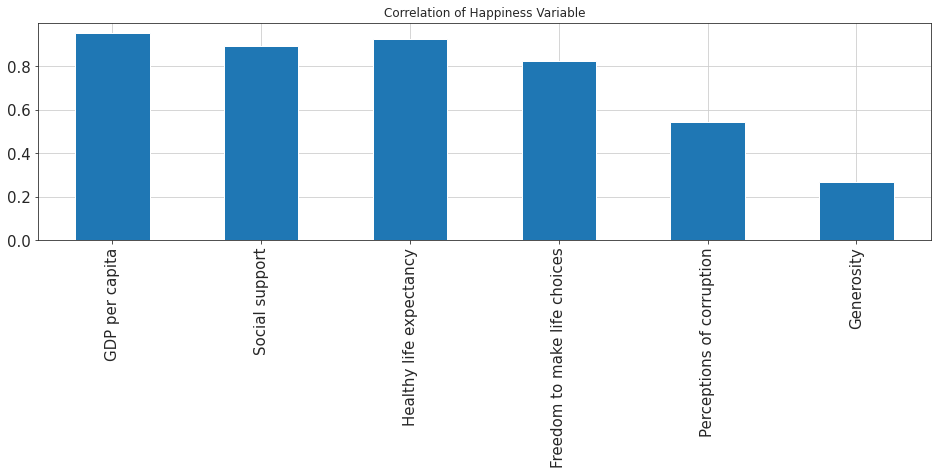

In [131]:
FET = data.drop(['Score'],axis=1)
TAR= data['Score']
FET.corrwith(TAR).plot.bar(figsize = (16, 4), title = "Correlation of Happiness Variable", fontsize = 15, rot = 90, grid = True)

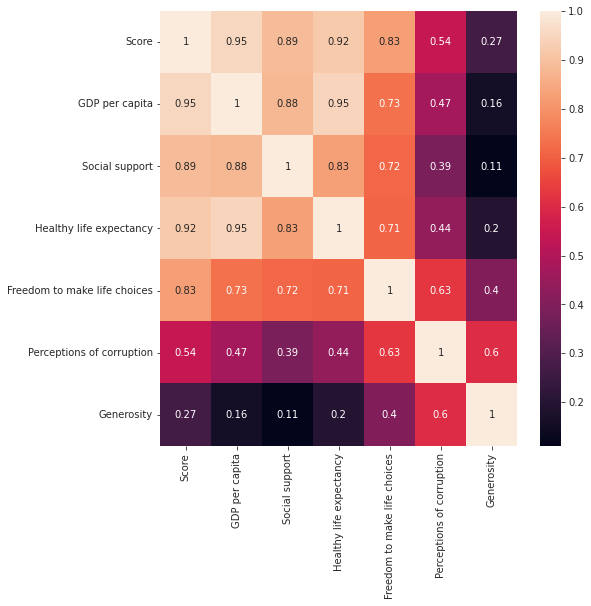

In [132]:
plt.figure(figsize=(8,8))
sns.heatmap(data= data.corr(), annot=True)

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       158 non-null    object 
 1   Score                         158 non-null    float64
 2   GDP per capita                158 non-null    float64
 3   Social support                158 non-null    float64
 4   Healthy life expectancy       158 non-null    float64
 5   Freedom to make life choices  158 non-null    float64
 6   Perceptions of corruption     158 non-null    float64
 7   Generosity                    158 non-null    float64
dtypes: float64(7), object(1)
memory usage: 15.2+ KB


In [134]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['country'] = encode.fit_transform(data['country'])

In [135]:
data.head()

,country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
Overall rank,,,,,,,,
1,134,7.6102,1.419951,1.445155,0.878627,0.631481,0.393255,0.275100
2,58,7.5572,1.430207,1.450718,0.892087,0.623669,0.340850,0.322082
3,37,7.5282,1.414355,1.465283,0.894304,0.625757,0.307169,0.369742
4,104,7.5006,1.464884,1.448552,0.895826,0.630778,0.269159,0.344698
5,24,7.4568,1.398368,1.413699,0.890340,0.607792,0.355444,0.307303


**SPLITTING DATA INTO TRAINING AND TEST SET**

In [136]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20)

In [137]:
X_train = train.drop(['Score'], axis = 1)
y_train = train['Score']           
print('Dimension of train_x dataframe:',X_train.shape)
print('Dimension of train_y dataframe:',y_train.shape)

Dimension of train_x dataframe: (126, 7)
Dimension of train_y dataframe: (126,)


In [138]:
X_test = test.drop(['Score'], axis = 1)
y_test = test['Score']           
print('Dimension of train_x dataframe:',X_test.shape)
print('Dimension of train_y dataframe:',y_test.shape)

Dimension of train_x dataframe: (32, 7)
Dimension of train_y dataframe: (32,)


**SCALING**

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-1.13654912e+00, -1.31531483e+00, -1.43506141e+00,
        -2.01839066e+00, -2.15249872e-01, -1.34955715e-01,
        -8.94791143e-01],
       [-1.43590885e-02,  5.72415130e-01,  8.46570307e-01,
         5.94609773e-01,  8.40013799e-01, -4.66235240e-01,
        -8.38375962e-01],
       [-1.05966438e-01,  3.94305705e-01,  1.27636925e-01,
         5.25254998e-01,  1.67291834e-01, -7.64531557e-01,
        -1.28576433e+00],
       [-1.34266565e+00, -1.73987150e+00, -1.68041655e+00,
        -1.42794724e+00, -1.14861540e+00, -3.79050326e-01,
         1.24233528e+00],
       [ 4.20775820e-01,  1.38292578e+00,  1.24278552e+00,
         1.49475207e+00,  2.03958142e+00,  3.06134862e+00,
         2.62367871e+00],
       [ 1.68037687e+00, -1.58270045e+00, -1.85979898e+00,
        -1.36504280e+00, -6.15418973e-01, -5.29149158e-01,
         5.75570539e-01],
       [-5.64003183e-01,  3.77494529e-01,  4.34195983e-01,
         4.12973113e-01,  8.52206512e-01,  6.43262897e-01,
        -3.0195979

**MODEL TRAINING and TESTING**

**LINEAR REGRESSION**

In [140]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [141]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from math import sqrt
model_pred = regressor.predict(X_test)
print('Model score:', regressor.score(X_test, y_test))
print("MSE : ", mean_squared_error(y_test, model_pred))
print("r2 : ", r2_score(y_test, model_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, model_pred)))

Model score: 0.9202103977820297
MSE :  0.10925283135060837
r2 :  0.9202103977820297
RMSE :  0.33053416064093644
